In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

import tensorflow as tf

## 1. 단순 선형 회귀모델의 비용 구하기

In [ ]:
##### 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.placeholder(tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

#----------------- 텐서플로의 그래프 완성 -------------------#

##### 비용함수를 가지고 그래프를 그려보기
sess = tf.Session()
cost_val = []

for i in range(-30, 50):
    result = sess.run(cost, feed_dict={W:i*0.1})
    cost_val.append(result)
    
plt.plot(cost_val)
sess.close()

## 2. 경사하강 알고리즘을 이용한 가중치 학습

In [ ]:
##### 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient)
update = W.assign(descent)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)

sess.close()

In [ ]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.01
descent = W - (learning_rate * gradient)
update = W.assign(descent)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    _, weight, c = sess.run([update, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5], 
                                                          y_train:[1, 2, 3, 4, 5]})
    print(step, weight, c)

sess.close()

#### 1) 경사 하강 알고리즘 객체 사용

In [ ]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5], 
                                                          y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0:
        print(step, weight, c, bias)


In [ ]:
##### Testing

print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5, 3.7]}))

In [ ]:
sess.close()

## 3. 응용 예제

+ 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.

In [ ]:
X = [1, 2, 3, 4, 5, 6, 7]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [ ]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, c = sess.run([update, cost], feed_dict={x_train:X, y_train:y})
    
    if step % 100 == 0:
        print(step, c)


In [ ]:
print(sess.run(hypot, feed_dict={x_train:[8]}))

## 4. 다중 선형 회귀모델

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

#### 1) 단순하게 처리하는 경우

In [ ]:
X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])

y = tf.placeholder(tf.float32, shape=[None])

##### 가설 설정 : y = W1X1 + W2X2 + W3X3 + b
W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypot = W1*X1 + W2*X2 + W3*X3 + b

##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.000001).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})
    
    if step % 500 == 0:
        print(step, c, h)

In [ ]:
sess.close()

#### 2) Matrix로 처리하는 경우

In [ ]:
X_data = [[73., 80., 75.],
         [93., 88., 93.],
         [89., 91., 90.],
         [96., 98., 100.],
         [73., 66., 70.]]

y_data = [[152.], 
          [185.], 
          [180.], 
          [196.], 
          [142.]]

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

##### 가설 설정 
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b

##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.000001).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(9000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X:X_data, y:y_data})
    
    if step % 1000 == 0:
        print(step, c, h)
        
sess.close()

#### 3) 1차원 데이터를 2차원으로 코드 처리

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

##### 데이터를 2차원으로 변환


X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

##### 가설 설정 
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b

##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.000001).minimize(cost)

#----------------------------------------------------------------------------------

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(9000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X:X_data, y:y_data})
    
    if step % 1000 == 0:
        print(step, c, h)
        
sess.close()

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

X_data = np.dstack([x1_data, x2_data, x3_data])[0]
y_data = np.array(y_data).reshape(-1, 1)

X_data
y_data

In [ ]:
# X_data = list([x1_data, x2_data, x3_data])
# X_data

X_data = []
for i in zip(x1_data, x2_data, x3_data):
    X_data.append(list(i))
    
X_data

y_data = np.reshape(y_data, (-1, 1))

In [ ]:
x_data = pd.DataFrame(zip(x1_data, x2_data, x3_data)).values
x_data

In [ ]:
datas = np.reshape([x1_data, x2_data, x3_data], (3, 5)).T
datas

In [ ]:
sess = tf.Session()
tf.stack([x1_data, x2_data, x3_data],axis=1).eval(session=sess)

## 5. 대용량 데이터 처리

### (1) DASK

+ 가상의 데이터 프레임
+ 병렬처리용 작업 스케줄러

In [ ]:
%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three
4, 4.44, four
5, 5.55, five
6, 6.66, six

In [ ]:
df1 = pd.read_csv("data/sample1.csv")
df1

df1[" c2"].mean()

In [ ]:
import dask.dataframe as dd

In [ ]:
df2 = dd.read_csv("data/sample1.csv")
df2

In [ ]:
df2.head()

In [ ]:
df2[" c2"].mean().compute()

In [ ]:
# 변경
df2[" c2"] = 100
df2.head()

# 추가
df2["c4"] = 200
df2.head()

In [ ]:
df2

In [ ]:
df3 = dd.read_csv("data/crime.csv", dtype=str, error_bad_lines=False, warn_bad_lines=False)
df3

In [ ]:
df3.head()
df3.tail()
df3.count().compute()

In [ ]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [ ]:
%%time
df3.count().compute()

In [ ]:
%%time
df3.count().compute(scheduler="processes", num_workers=8)

In [ ]:
##### 복수 개의 데이터 처리

In [ ]:
%%writefile "data/sample2.csv"
c1, c2, c3
7, 7.77, seven
8, 8.88, eight
9, 9.99, nine

In [ ]:
df4 = dd.read_csv("data/sample*.csv")

In [ ]:
df4.count().compute()

### (2) QueueRunner

##### 1) 간단한 예제 1

+ enqueue_many와 dequeue

In [2]:
##### queue의 길이와 저장될 데이터 형식
q = tf.FIFOQueue(20, "float")

# enc_ops = q.enqueue_many(([1.0, 2.0, 3.0, 4.0],))
# qr = tf.train.QueueRunner(q, [enc_ops]*3)

enc_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enc_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enc_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr = tf.train.QueueRunner(q, [enc_ops1, enc_ops2, enc_ops3])

sess = tf.Session()
coordi = tf.train.Coordinator()
threads = qr.create_threads(sess, coord=coordi, start=True)

for step in range(20):
    print(sess.run(q.dequeue()))

coordi.request_stop()
coordi.join(threads)
sess.close()

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
4.0
5.0
6.0
1.0
2.0
3.0
4.0
5.0
6.0
1.0
2.0


##### 2) 파일로부터 데이터 불러오기

In [3]:
# sample1, sample2 파일 불러올 때 변수명 삭제하기(c1, c2, c3)
filename_queue = tf.train.string_input_producer(["data/sample1.csv", "data/sample2.csv"],
                                               shuffle=False, name="filename_queue")

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

recored_defaults = [[0], [0.0], ["null"]]
a1, a2, a3 = tf.decode_csv(value, record_defaults=recored_defaults, field_delim=",")

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.


In [4]:
sess = tf.Session()
coordi = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coordi)

for i in range(30):
    print(sess.run([a1, a2, a3]))
    
coordi.request_stop()
coordi.join(threads)
sess.close()

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.44, b' four']
[5, 5.55, b' five']
[6, 6.66, b' six']
[7, 7.77, b' seven']
[8, 8.88, b' eight']
[9, 9.99, b' nine']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.44, b' four']
[5, 5.55, b' five']
[6, 6.66, b' six']
[7, 7.77, b' seven']
[8, 8.88, b' eight']
[9, 9.99, b' nine']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.44, b' four']
[5, 5.55, b' five']
[6, 6.66, b' six']
[7, 7.77, b' seven']
[8, 8.88, b' eight']
[9, 9.99, b' nine']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']


##### 3) 슬라이드 소스보기

+ 커널이 계속 재시작됨

In [2]:
filename_queue = tf.train.string_input_producer(['data/data-01-test-score.csv'])

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

xy = tf.decode_csv(value, record_defaults=[[0.], [0.], [0.], [0.]])
xy

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.


[<tf.Tensor 'DecodeCSV:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:2' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:3' shape=() dtype=float32>]

In [3]:
"""
BATCH
-------
- Full Batch 또는 Batch : 전체 데이터
    - 샘플 전체를 계산하므로 시간이 많이 걸린다.
    - 데이터가 많을 경우(한번에 데이터를 메모리에 load하지 못하는 경우) 사용이 불가
    - 오차율이 적다.
    
- Stochastic Gradient Descent: 한 개의 데이터
    - 데이터를 한개씩 추출해서 처리해보고 이를 모든 데이터에 반복
    - 오차율이 클 수 있다.
    - 하드웨어 성능을 제대로 발휘할 수 없다.(특히 GPU)

- Mini Batch
    - 전체 훈련데이터를 배치 사이즈로 등분하여 각 배치 셋을 순차적으로 수행
    - Full Batch보다 빠르고 SGD보다 오차율도 낮다.
    
- Epoch(또는 Iteration) : 배치의 수행 횟수
"""

'\nBATCH\n-------\n- Full Batch 또는 Batch : 전체 데이터\n    - 샘플 전체를 계산하므로 시간이 많이 걸린다.\n    - 데이터가 많을 경우(한번에 데이터를 메모리에 load하지 못하는 경우) 사용이 불가\n    - 오차율이 적다.\n    \n- Stochastic Gradient Descent: 한 개의 데이터\n    - 데이터를 한개씩 추출해서 처리해보고 이를 모든 데이터에 반복\n    - 오차율이 클 수 있다.\n    - 하드웨어 성능을 제대로 발휘할 수 없다.(특히 GPU)\n\n- Mini Batch\n    - 전체 훈련데이터를 배치 사이즈로 등분하여 각 배치 셋을 순차적으로 수행\n    - Full Batch보다 빠르고 SGD보다 오차율도 낮다.\n    \n- Epoch(또는 Iteration) : 배치의 수행 횟수\n'

In [4]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [5]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypot-y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

coordi = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coordi)

for step in range(2000):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    _, c, h = sess.run([train, cost, hypot], feed_dict={X:x_batch, y:y_batch})
        
    if step%500 == 0:
        print(step, c, h)
        
coordi.request_stop()
coordi.join(threads)

sess.run(hypot, feed_dict={X:[[100, 70, 101]]})

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


## 6. 로지스틱 회귀 모델

In [2]:
X_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [12]:
X = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# 가설
hypot = tf.sigmoid(tf.matmul(X, W) + b)

# 비용
cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, h= sess.run([train, hypot], feed_dict={X:X_data, y:y_data})
    
    if step % 100 == 0:
        print(step, h)

0 [[0.5582257 ]
 [0.4134882 ]
 [0.5041346 ]
 [0.2924463 ]
 [0.24039465]
 [0.24956048]]
100 [[0.6100351 ]
 [0.5548015 ]
 [0.742378  ]
 [0.616751  ]
 [0.6464854 ]
 [0.74775714]]
200 [[0.53894544]
 [0.47981304]
 [0.7595339 ]
 [0.60443205]
 [0.6629227 ]
 [0.8050238 ]]
300 [[0.4804067 ]
 [0.42198294]
 [0.77082735]
 [0.59599686]
 [0.6771136 ]
 [0.842933  ]]
400 [[0.43325308]
 [0.37856176]
 [0.77847314]
 [0.59143156]
 [0.6905429 ]
 [0.86935496]]
500 [[0.39504772]
 [0.34561184]
 [0.7832766 ]
 [0.5892323 ]
 [0.7027403 ]
 [0.88813186]]
600 [[0.36373785]
 [0.32022882]
 [0.78586197]
 [0.58851004]
 [0.7136288 ]
 [0.9017788 ]]
700 [[0.33774143]
 [0.30037817]
 [0.7867014 ]
 [0.5887439 ]
 [0.7233043 ]
 [0.91192   ]]
800 [[0.31587067]
 [0.28464034]
 [0.78614795]
 [0.5896199 ]
 [0.731917  ]
 [0.9196106 ]]
900 [[0.29723713]
 [0.27201405]
 [0.78446794]
 [0.5909442 ]
 [0.7396247 ]
 [0.9255496 ]]
1000 [[0.28117216]
 [0.26178065]
 [0.78186387]
 [0.5925918 ]
 [0.74657017]
 [0.9302091 ]]
1100 [[0.2671683 ]
 [0

9300 [[0.04019864]
 [0.16997138]
 [0.3473357 ]
 [0.762595  ]
 [0.92712575]
 [0.9760859 ]]
9400 [[0.03952504]
 [0.16927657]
 [0.3444738 ]
 [0.7638263 ]
 [0.9279783 ]
 [0.976359  ]]
9500 [[0.03886652]
 [0.16858432]
 [0.34165412]
 [0.76504296]
 [0.9288159 ]
 [0.9766283 ]]
9600 [[0.03822283]
 [0.1678954 ]
 [0.33887735]
 [0.7662466 ]
 [0.92963946]
 [0.97689396]]
9700 [[0.03759347]
 [0.16720937]
 [0.3361414 ]
 [0.7674364 ]
 [0.9304489 ]
 [0.97715604]]
9800 [[0.03697807]
 [0.16652657]
 [0.3334461 ]
 [0.7686131 ]
 [0.93124473]
 [0.9774146 ]]
9900 [[0.03637628]
 [0.16584703]
 [0.33079076]
 [0.7697772 ]
 [0.9320273 ]
 [0.97766966]]


In [24]:
preds = tf.cast(hypot > 0.5, dtype=tf.float32)
sess.run(preds, feed_dict={X:X_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), dtype=tf.float32))

h, p, a = sess.run([hypot, preds, accuracy], feed_dict={X:X_data, y:y_data})
print(h)
print(p)
print(a)

[[0.0357877 ]
 [0.16517057]
 [0.32817388]
 [0.77092785]
 [0.9327965 ]
 [0.9779212 ]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
1.0


#### (1) Softmax

In [25]:
X_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

In [27]:
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설
hypot = tf.nn.softmax(tf.matmul(X, W) + b)

# 비용
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypot), axis=1))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [31]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, c = sess.run([train, cost], feed_dict={X:X_data, y:y_data})
    
    if step%100 == 0:
        print(step, c)

0 6.668322
100 1.6710966
200 1.0050349
300 0.87072027
400 0.8030908
500 0.7542876
600 0.7160576
700 0.685074
800 0.6593447
900 0.63752806
1000 0.618693
1100 0.6021799
1200 0.58751464
1300 0.5743493
1400 0.56242204
1500 0.55153227
1600 0.5415227
1700 0.5322666
1800 0.52366304
1900 0.5156269
2000 0.50808877
2100 0.50098926
2200 0.49427944
2300 0.4879159
2400 0.48186266
2500 0.47608793
2600 0.47056472
2700 0.4652688
2800 0.46017972
2900 0.45527935


In [35]:
preds = tf.argmax(hypot, 1)
sess.run(preds, feed_dict={X:X_data, y:y_data})

array([2, 2, 2, 1, 0, 1, 0, 0], dtype=int64)

In [37]:
correct = tf.equal(preds, tf.argmax(y, 1))
sess.run(correct, feed_dict={X:X_data, y:y_data})

array([ True,  True,  True,  True, False,  True,  True,  True])

In [40]:
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:X_data, y:y_data})

0.875

In [44]:
##### 테스트 : [1, 11, 7, 9]

result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
print(result)

print(sess.run(tf.argmax(result, 1)))

[[9.4789177e-01 5.1933322e-02 1.7495222e-04]]
[0]


#### (2) softmax_cross_entropy_with_logits() 

In [47]:
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설과 비용
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_data)

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 그래프 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, c = sess.run([train, cost], feed_dict={X:X_data, y:y_data})
        
# 테스트
result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
print(result)

print(sess.run(tf.argmax(result, 1)))

[[8.5100368e-02 9.1489339e-01 6.2558524e-06]]
[1]


#### (3) 사례1 : 동물 분류

In [50]:
xy = np.loadtxt("data/data-04-zoo.csv", dtype=np.float32, delimiter=",")
print(xy.shape)

X_data = xy[:, 0 : -1]
y_data = xy[:, [-1]]

print(X_data.shape, y_data.shape)

(101, 17)
(101, 16) (101, 1)


In [54]:
X = tf.placeholder(tf.float32, shape=[None, 16])
y = tf.placeholder(tf.int32, shape=[None, 1])

W = tf.Variable(tf.random_normal([16, 7]))
b = tf.Variable(tf.random_normal([7]))

##### Label을 Onehot encoding으로 처리
y_one_hot = tf.one_hot(y, 7)
#sess = tf.Session()
#print(sess.run(y_one_hot, feed_dict={y:y_data}))
y_one_hot = tf.reshape(y_one_hot, [-1, 7])

##### 가설과 비용
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_one_hot)

##### 최소 비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [57]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(200):
    _, c = sess.run([train, tf.reduce_mean(cost)], feed_dict={X:X_data, y:y_data})
    
    if step%10 == 0:
        print(step, c)

0 4.318383
10 0.5863058
20 0.383935
30 0.28276885
40 0.22393472
50 0.18508594
60 0.1577622
70 0.13755041
80 0.12198649
90 0.1096151
100 0.09953153
110 0.09114672
120 0.084060885
130 0.077992804
140 0.07273827
150 0.06814502
160 0.06409685
170 0.060503423
180 0.05729331
190 0.054409157


In [58]:
preds = tf.argmax(hypot, 1)
correct = tf.equal(preds, tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

sess.run(accuracy, feed_dict={X:X_data, y:y_data})

1.0

#### (4) 사례2 : MNIST 이미지 데이터셋

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print(type(mnist))
dir(mnist)

mnist.train.labels
print(mnist.train.num_examples)
print(mnist.test.num_examples)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000
10000


In [25]:
X = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.random_normal([28*28, 10]))
b = tf.Variable(tf.random_normal([10]))

##### 가설과 비용
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y)

##### 최소 비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [26]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

correct = tf.equal(tf.argmax(hypot, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [20]:
##### full batch

for step in range(400):
    _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy],
              feed_dict={X:mnist.train.images , y:mnist.train.labels})
    
    if step%20 == 0:
        print(c, '\t', a)

0.95444703 	 0.8031818
0.9170624 	 0.8098182
0.8847155 	 0.8150727
0.85636103 	 0.8203091
0.8312328 	 0.8251455
0.8087558 	 0.8295818
0.7884909 	 0.8326909
0.7700966 	 0.8355455
0.7533031 	 0.83843637
0.73789304 	 0.84098184
0.72368836 	 0.8435818
0.7105409 	 0.8459273
0.6983259 	 0.8477455
0.68693763 	 0.8500182
0.6762861 	 0.8518364
0.6662936 	 0.8537273
0.6568939 	 0.8552909
0.648029 	 0.8568182
0.6396488 	 0.85818183
0.6317092 	 0.85954547


In [27]:
##### mini batch

training_epochs = 5
batch_size = 100

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy],
              feed_dict={X:batch_x , y:batch_y})
            
        avg_cost += c / total_batch
        
    print(avg_cost, "\t", a)

3.4821466621485584 	 0.89
2.113929007378489 	 0.87
1.9453723824024187 	 0.88
1.961715141507711 	 0.94
1.8876371998678558 	 0.91


In [30]:
import random

r = random.randint(0, mnist.test.num_examples-1)
r

4829

In [31]:
print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))

Label :  [8]


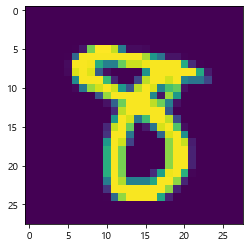

In [32]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28))

In [33]:
print("Prediction : ", sess.run(tf.argmax(hypot, 1), feed_dict={X:mnist.test.images[r:r+1]}))

Prediction :  [8]
